In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
from wordcloud import WordCloud

In [4]:
cursera1 = pd.read_csv('Coursera_courses.csv')
cursera2 = pd.read_csv('Coursera_reviews.csv')
edx = pd.read_csv('edx_courses.csv')
udemy = pd.read_csv('udemy_courses.csv')

EDA COURSERA1

In [7]:
cursera1.info()
cursera1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


name           0
institution    0
course_url     0
course_id      0
dtype: int64

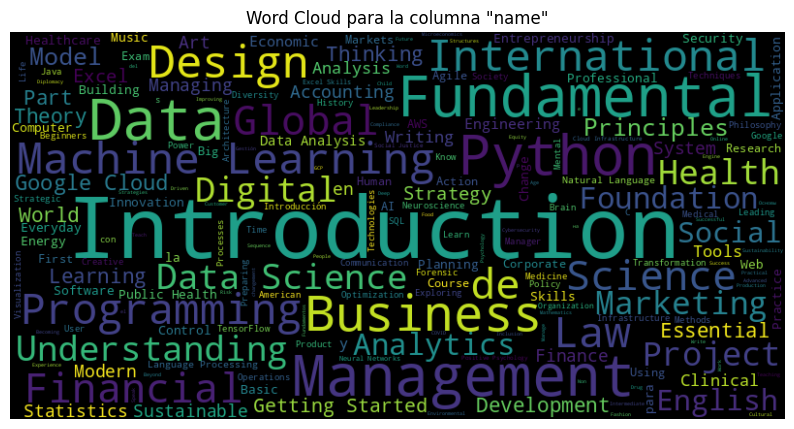

In [12]:
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400).generate(' '.join(cursera1['name']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud para la columna "name"')
plt.show()

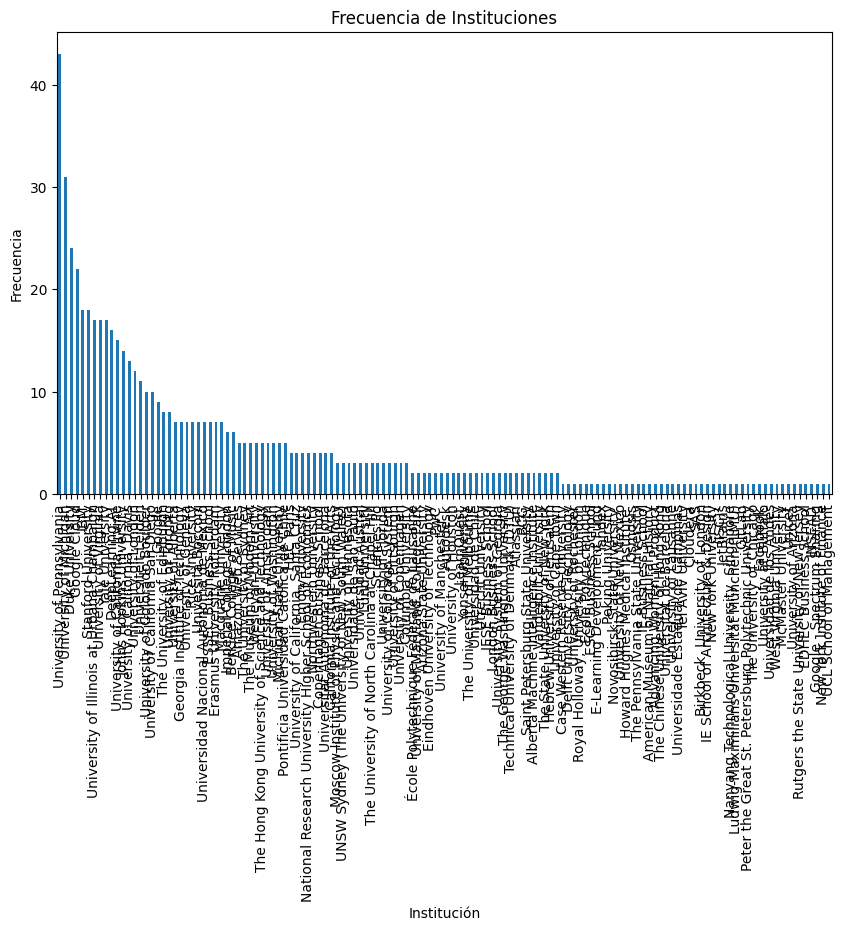

In [14]:
institution_counts = cursera1['institution'].value_counts()
plt.figure(figsize=(10, 6))
institution_counts.plot(kind='bar')
plt.xlabel('Institución')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Instituciones')
plt.xticks(rotation=90)
plt.show()

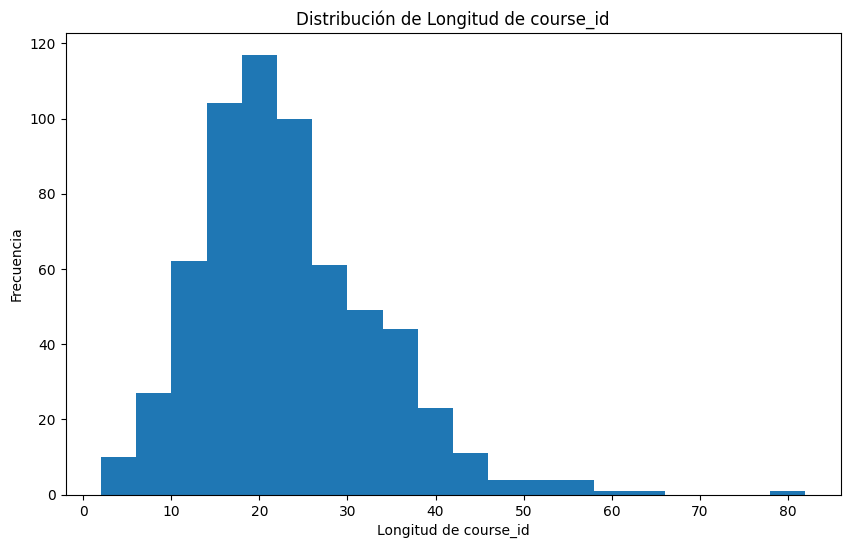

In [15]:
cursera1['course_id_length'] = cursera1['course_id'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(cursera1['course_id_length'], bins=20)
plt.xlabel('Longitud de course_id')
plt.ylabel('Frecuencia')
plt.title('Distribución de Longitud de course_id')
plt.show()

EDA CURSERA2

In [16]:
cursera2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222862 entries, 0 to 222861
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   reviews       222844 non-null  object 
 1   reviewers     222861 non-null  object 
 2   date_reviews  222861 non-null  object 
 3   rating        222861 non-null  float64
 4   course_id     222861 non-null  object 
dtypes: float64(1), object(4)
memory usage: 8.5+ MB


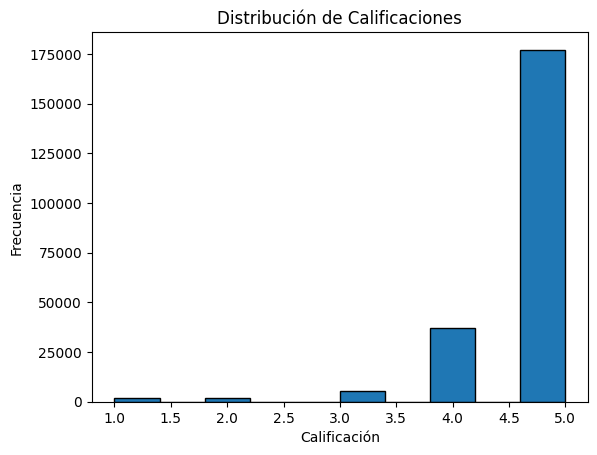

In [18]:
plt.hist(cursera2['rating'], bins=10, edgecolor='k')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones')
plt.show()

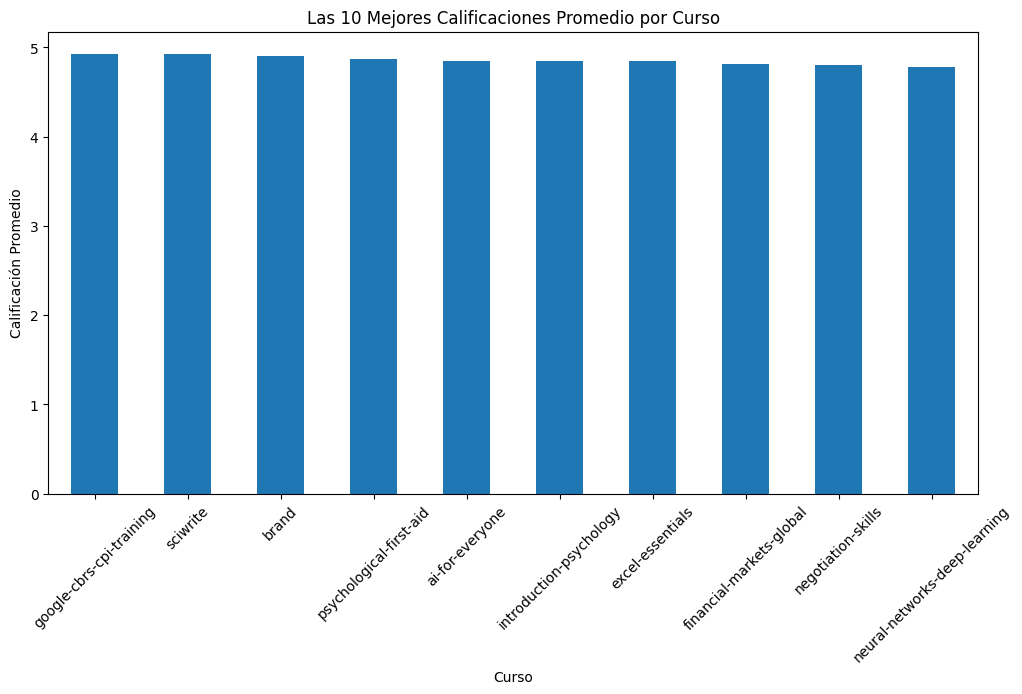

In [19]:
average_ratings = cursera2.groupby('course_id')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
average_ratings.head(10).plot(kind='bar')
plt.xlabel('Curso')
plt.ylabel('Calificación Promedio')
plt.title('Las 10 Mejores Calificaciones Promedio por Curso')
plt.xticks(rotation=45)
plt.show()

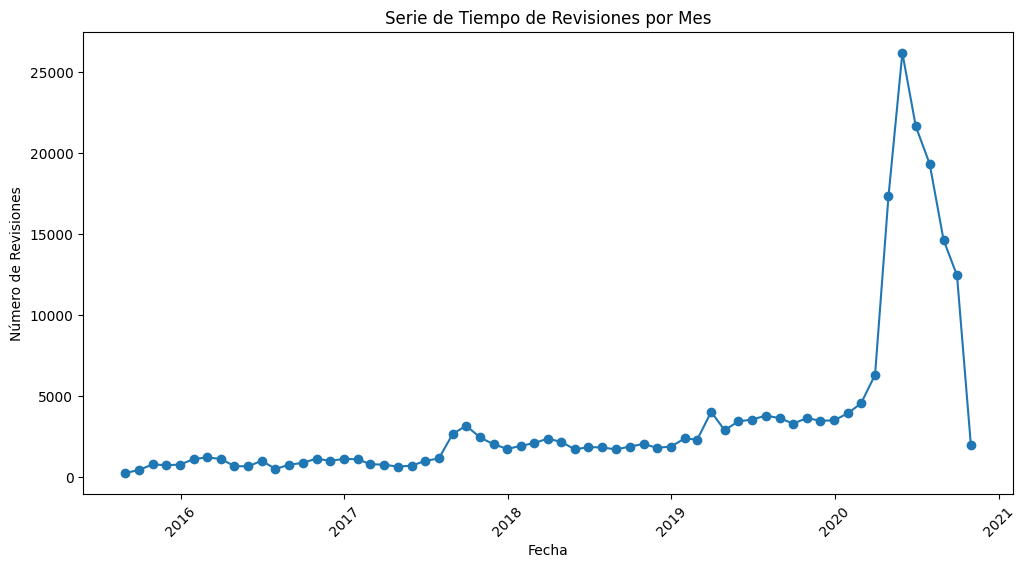

In [20]:
cursera2['date_reviews'] = pd.to_datetime(cursera2['date_reviews'])
reviews_by_date = cursera2.resample('M', on='date_reviews')['reviews'].count()

plt.figure(figsize=(12, 6))
plt.plot(reviews_by_date.index, reviews_by_date.values, marker='o')
plt.xlabel('Fecha')
plt.ylabel('Número de Revisiones')
plt.title('Serie de Tiempo de Revisiones por Mes')
plt.xticks(rotation=45)
plt.show()


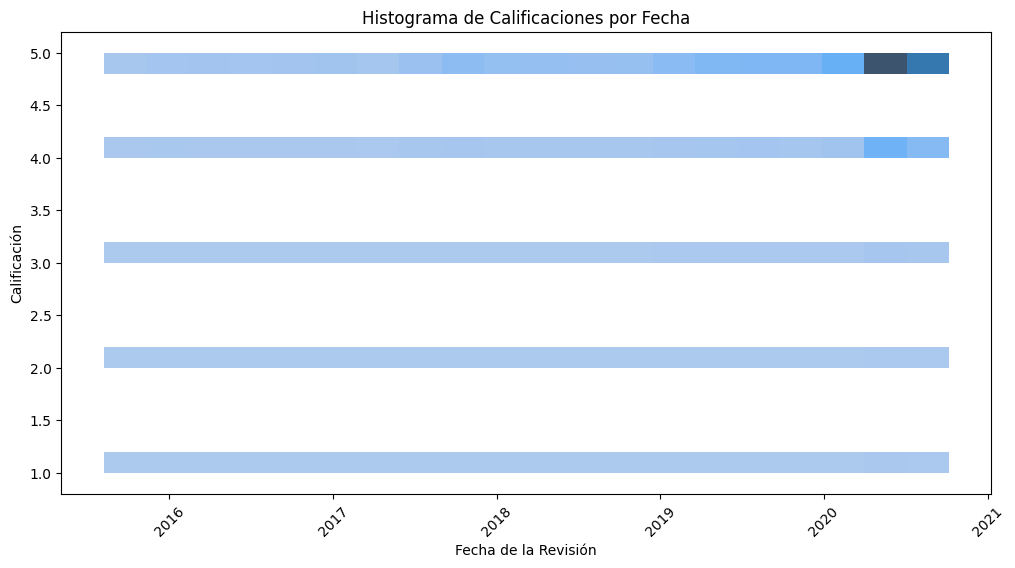

In [27]:
plt.figure(figsize=(12, 6))
cursera2['date_reviews'] = pd.to_datetime(cursera2['date_reviews'])
sns.histplot(data=cursera2, x='date_reviews', y='rating', bins=20)
plt.xlabel('Fecha de la Revisión')
plt.ylabel('Calificación')
plt.title('Histograma de Calificaciones por Fecha')
plt.xticks(rotation=45)
plt.show()

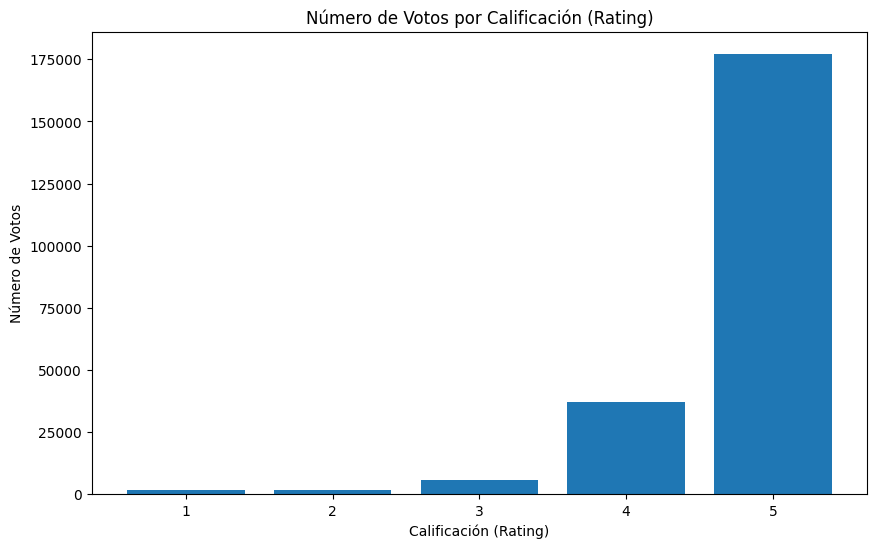

In [31]:
rating_counts = cursera2['rating'].value_counts().sort_index()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Calificación (Rating)')
plt.ylabel('Número de Votos')
plt.title('Número de Votos por Calificación (Rating)')
plt.xticks(rating_counts.index)
plt.show()


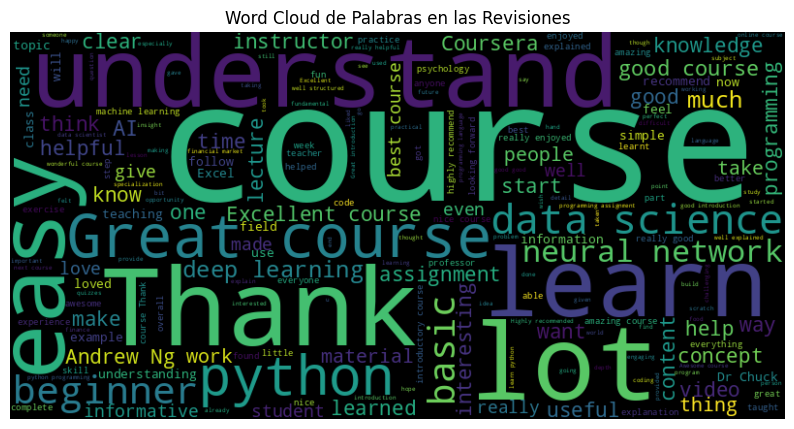

In [23]:
text_reviews = cursera2['reviews'].apply(lambda x: str(x) if isinstance(x, str) else '')

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400).generate(' '.join(text_reviews))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Palabras en las Revisiones')
plt.show()

## EDA UDEMY

In [32]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


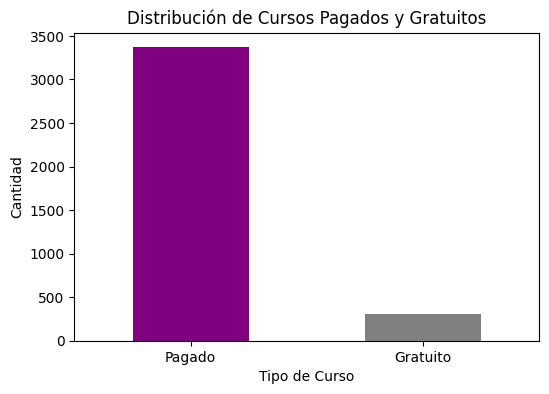

In [38]:
plt.figure(figsize=(6, 4))
udemy['is_paid'].value_counts().plot(kind='bar', color=['purple', 'gray'])
plt.title('Distribución de Cursos Pagados y Gratuitos')
plt.xlabel('Tipo de Curso')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Pagado', 'Gratuito'], rotation=0)
plt.show()

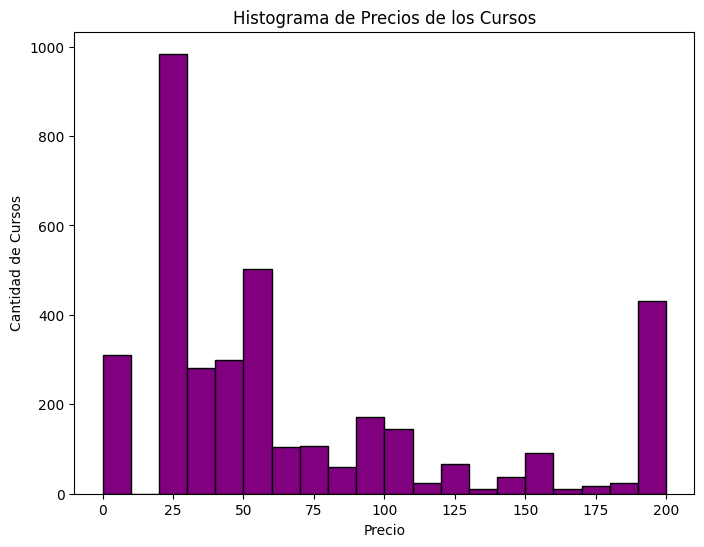

In [36]:
plt.figure(figsize=(8, 6))
plt.hist(udemy['price'], bins=20, edgecolor='k', color='purple')
plt.title('Histograma de Precios de los Cursos')
plt.xlabel('Precio')
plt.ylabel('Cantidad de Cursos')
plt.show()

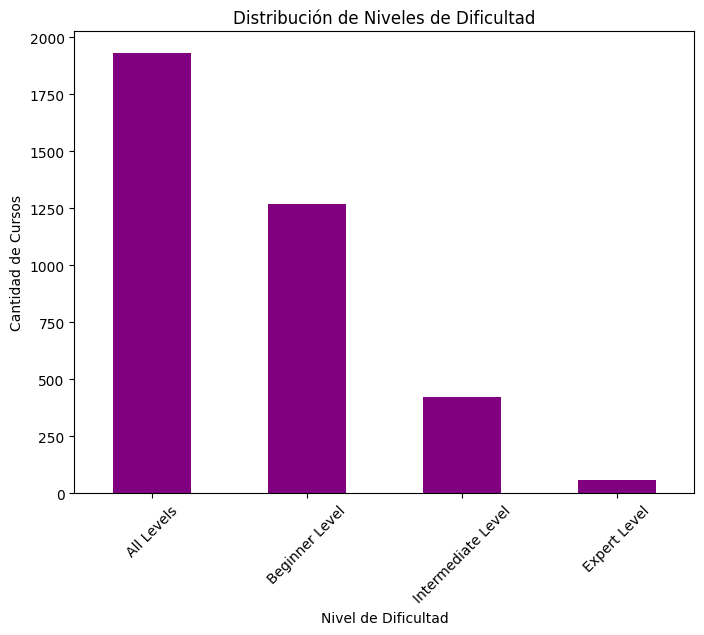

In [35]:
plt.figure(figsize=(8, 6))
udemy['level'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribución de Niveles de Dificultad')
plt.xlabel('Nivel de Dificultad')
plt.ylabel('Cantidad de Cursos')
plt.xticks(rotation=45)
plt.show()

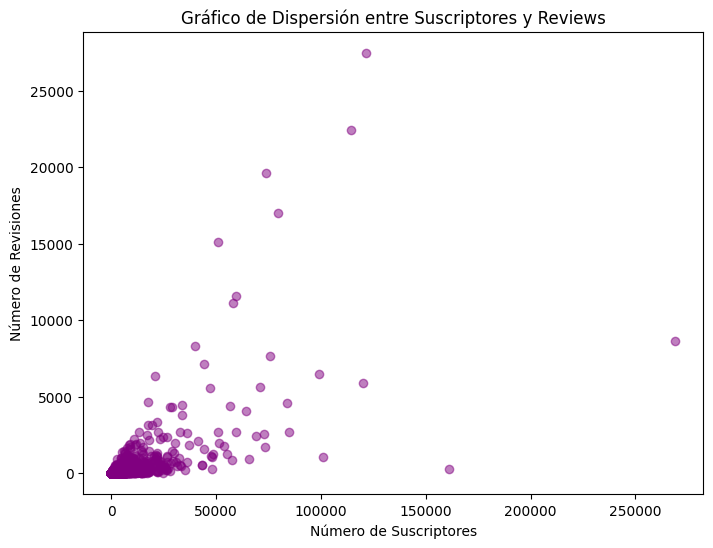

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(udemy['num_subscribers'], udemy['num_reviews'], alpha=0.5, color='purple')
plt.title('Gráfico de Dispersión entre Suscriptores y Reviews')
plt.xlabel('Número de Suscriptores')
plt.ylabel('Número de Revisiones')
plt.show()

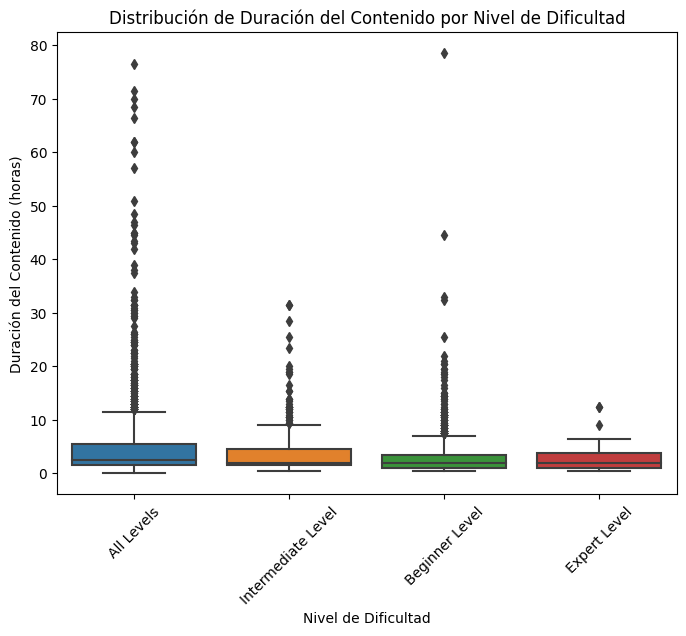

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=udemy, x='level', y='content_duration')
plt.title('Distribución de Duración del Contenido por Nivel de Dificultad')
plt.xlabel('Nivel de Dificultad')
plt.ylabel('Duración del Contenido (horas)')
plt.xticks(rotation=45)
plt.show()

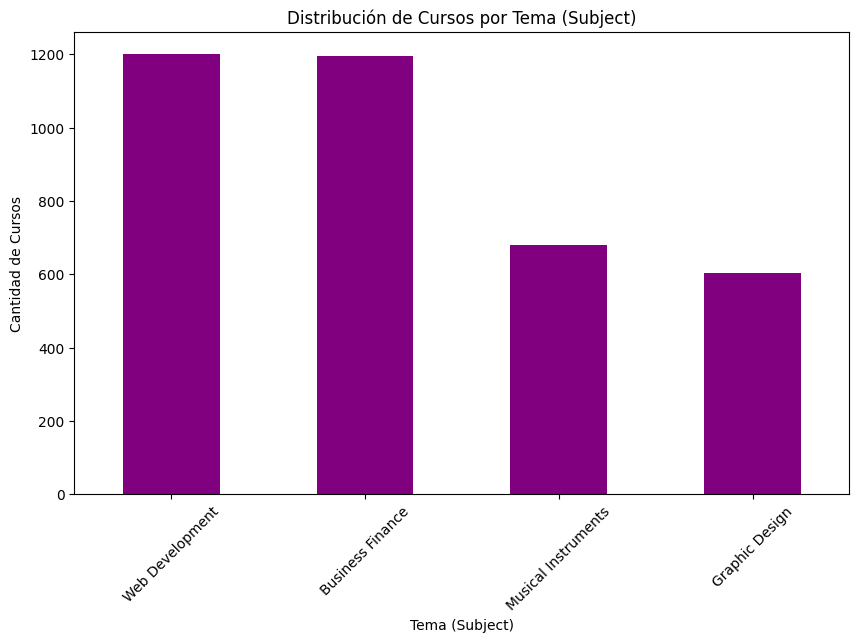

In [44]:
plt.figure(figsize=(10, 6))
udemy['subject'].value_counts().plot(kind='bar', color='purple ')
plt.title('Distribución de Cursos por Tema (Subject)')
plt.xlabel('Tema (Subject)')
plt.ylabel('Cantidad de Cursos')
plt.xticks(rotation=45)
plt.show()

<ipython-input-42-402eb51e4a3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = udemy.corr()


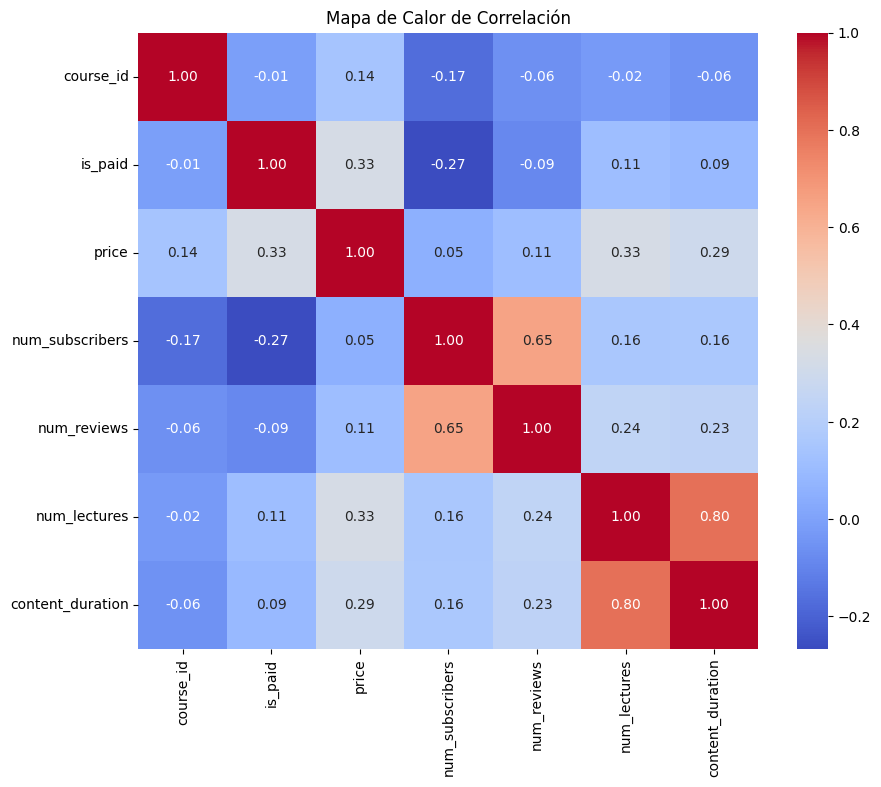

In [42]:
plt.figure(figsize=(10, 8))
correlation_matrix = udemy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

## EDA EDX

In [45]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

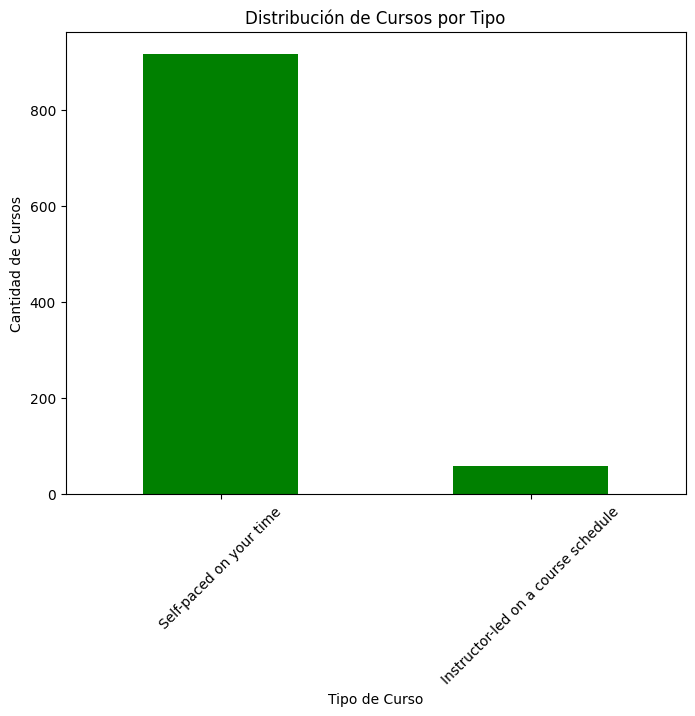

In [46]:
plt.figure(figsize=(8, 6))
edx['course_type'].value_counts().plot(kind='bar', color='green')
plt.title('Distribución de Cursos por Tipo')
plt.xlabel('Tipo de Curso')
plt.ylabel('Cantidad de Cursos')
plt.xticks(rotation=45)
plt.show()

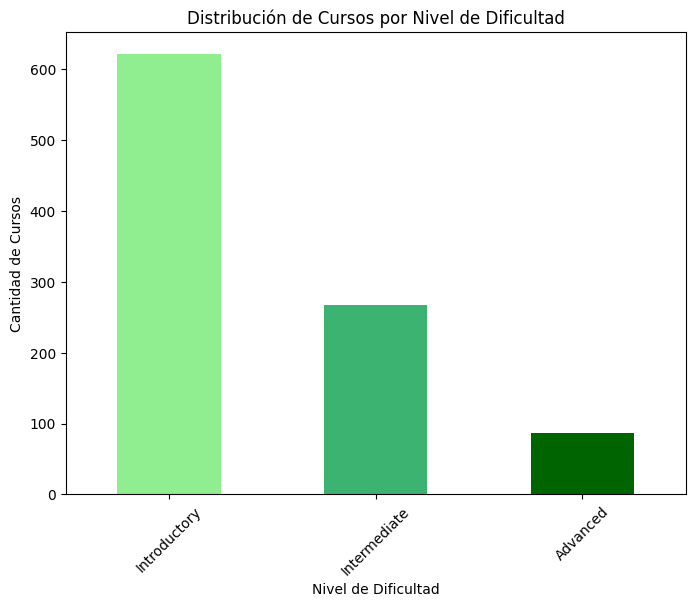

In [47]:
plt.figure(figsize=(8, 6))
edx['Level'].value_counts().plot(kind='bar', color=['lightgreen', 'mediumseagreen', 'darkgreen'])
plt.title('Distribución de Cursos por Nivel de Dificultad')
plt.xlabel('Nivel de Dificultad')
plt.ylabel('Cantidad de Cursos')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


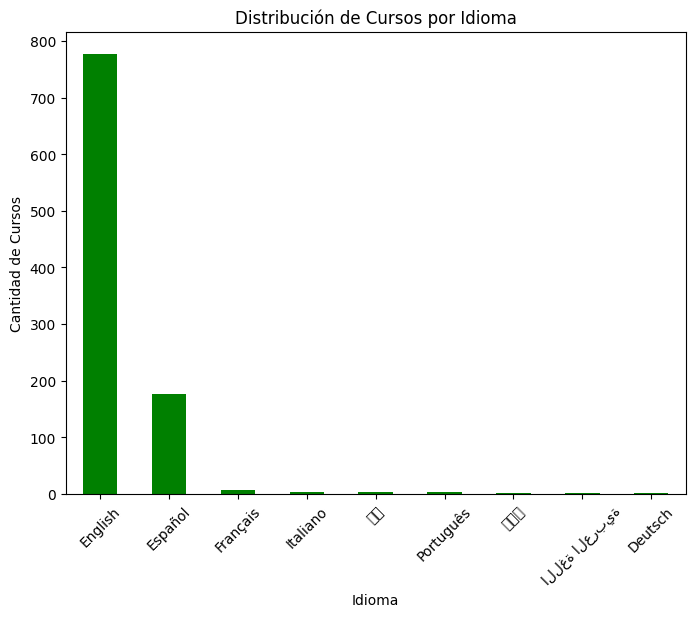

In [48]:
plt.figure(figsize=(8, 6))
edx['language'].value_counts().plot(kind='bar', color='green')
plt.title('Distribución de Cursos por Idioma')
plt.xlabel('Idioma')
plt.ylabel('Cantidad de Cursos')
plt.xticks(rotation=45)
plt.show()

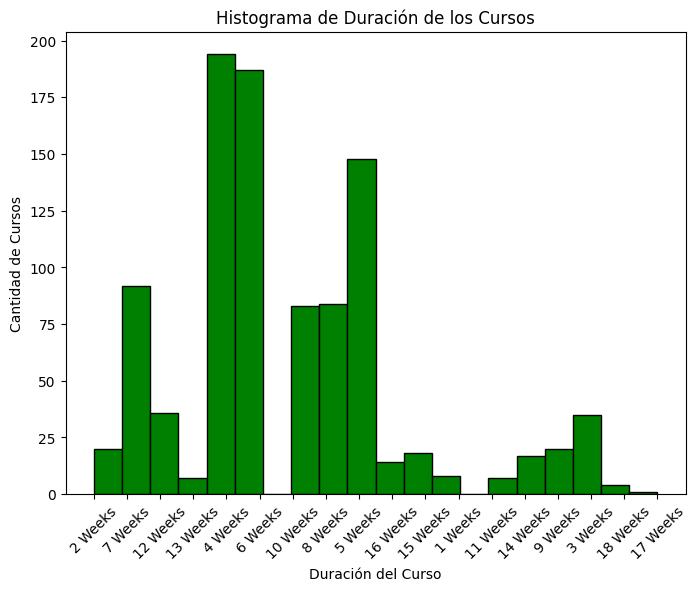

In [52]:
plt.figure(figsize=(8, 6))
plt.hist(edx['course_length'], bins=20, edgecolor='k', color='green')
plt.title('Histograma de Duración de los Cursos')
plt.xlabel('Duración del Curso')
plt.ylabel('Cantidad de Cursos')
plt.xticks(rotation=45)
plt.show()


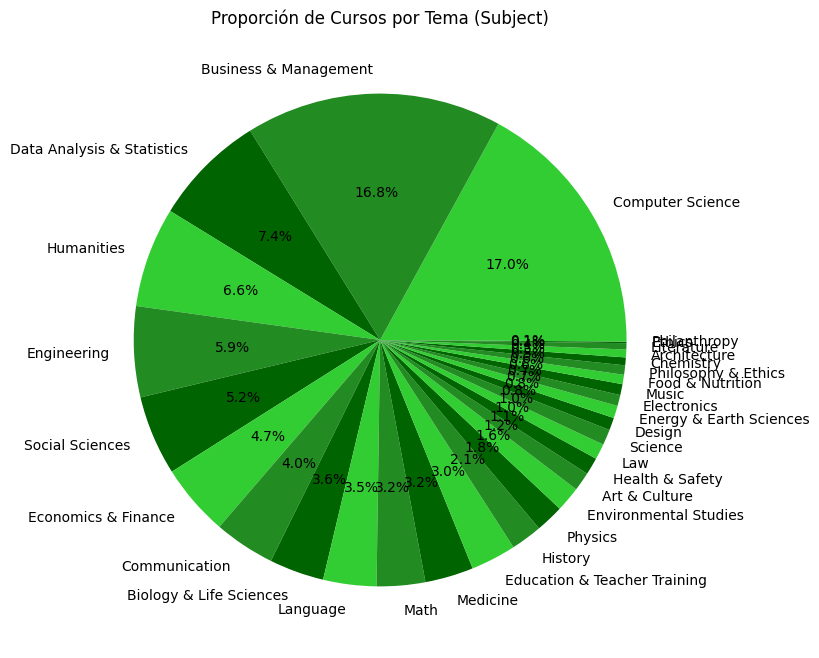

In [53]:
plt.figure(figsize=(8, 8))
edx['subject'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['limegreen', 'forestgreen', 'darkgreen'])
plt.title('Proporción de Cursos por Tema (Subject)')
plt.ylabel('')
plt.show()

<Figure size 1000x600 with 0 Axes>

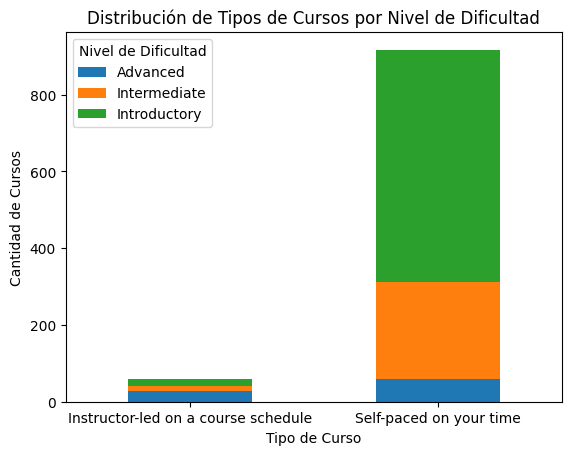

In [56]:
plt.figure(figsize=(10, 6))
ct_vs_level = edx.groupby(['course_type', 'Level']).size().unstack()
ct_vs_level.plot(kind='bar', stacked=True)
plt.title('Distribución de Tipos de Cursos por Nivel de Dificultad')
plt.xlabel('Tipo de Curso')
plt.ylabel('Cantidad de Cursos')
plt.xticks(rotation=0)
plt.legend(title='Nivel de Dificultad')
plt.show()